<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/Tranfer_Learning_practice/Tranfer_Learning_feature_extraction(without_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  Data_set li
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/Project/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Flatten 
from keras.applications.vgg16 import VGG16 

In [5]:
# Lets  make object of VGG16 
conv_base = VGG16(weights ='imagenet',
                  include_top= False ,
                  # include_top=False means we importing up to only convolutional part .
                  input_shape=(150,150,3)   
                  )

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
# Now we made our own sequential model 
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = False # this is to freeze the conv_base for training

In [10]:
# Now let check the number of trainable params
conv_base.summary()
# It conv_base the trainable parameter is Zero 
model.summary()
#  and in this obvioulsy the trainable params is reduced.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
# generator
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode ='int',
    batch_size=32,
    image_size = (150,150)                            
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size=32,
    image_size = (150,150)                            
)
# batch_size: Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize 
def process(image, label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds =  validation_ds.map(process)

In [13]:
# Now we compile 
model.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs = 10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 83ms/step - loss: 0.2701 - accuracy: 0.8831 - val_loss: 0.2061 - val_accuracy: 0.9126
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1904 - accuracy: 0.9204 - val_loss: 0.1973 - val_accuracy: 0.9186
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1595 - accuracy: 0.9348 - val_loss: 0.2027 - val_accuracy: 0.9158
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1294 - accuracy: 0.9485 - val_loss: 0.2859 - val_accuracy: 0.8860
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1016 - accuracy: 0.9602 - val_loss: 0.2424 - val_accuracy: 0.9086
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0833 - accuracy: 0.9674 - val_loss: 0.2493 - val_accuracy: 0.9084
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0574 - accuracy: 0.9791 - val_loss: 0.2930 - val_accurac

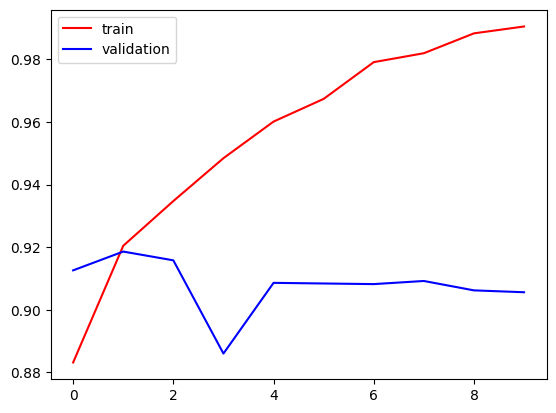

In [19]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'] , color ='red' , label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label='validation')
plt.legend()
plt.show()

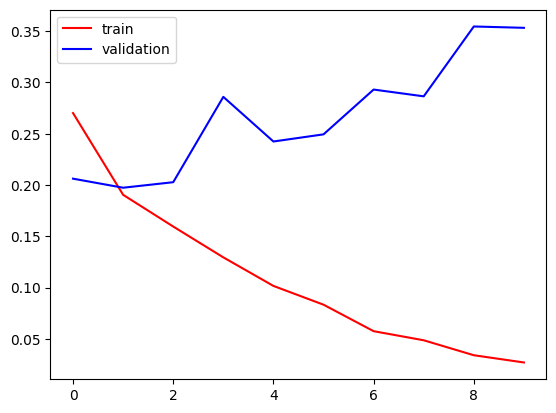

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Here it is very clear. Overfitting is happen. 
